In [1]:
import pandas

# Load data

In [2]:
df = pandas.read_csv("data/dataset.csv")

In [3]:
df["TIME"] = pandas.to_datetime(df["TIME"], format="%Y-%m-%d %H:%M:%S")

In [4]:
df = df.set_index("TIME")

In [5]:
df = df.sort_index()

In [6]:
df = df.reset_index()

In [7]:
df

,TIME,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2018-08-01 12:30:02,1,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501
1,2018-08-01 12:30:02,93,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,-6.296924
2,2018-08-01 12:30:02,92,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,-6.292432
3,2018-08-01 12:30:02,14,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,-6.263371
4,2018-08-01 12:30:02,91,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,-6.231291
...,...,...,...,...,...,...,...,...,...,...,...
41898481,2023-12-26 00:30:03,32,2023-12-26 00:28:13,PEARSE STREET,30,24,6,OPEN,Pearse Street,53.344300,-6.250430
41898482,2023-12-26 00:30:03,31,2023-12-26 00:27:36,PARNELL STREET,20,5,15,OPEN,Parnell Street,53.350900,-6.265120
41898483,2023-12-26 00:30:03,30,2023-12-26 00:21:52,PARNELL SQUARE NORTH,20,18,2,OPEN,Parnell Square North,53.353500,-6.265310
41898484,2023-12-26 00:30:03,27,2023-12-26 00:28:18,MOLESWORTH STREET,20,10,10,OPEN,Molesworth Street,53.341300,-6.258120


In [8]:
print("Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES")
print((df["BIKE STANDS"]-df["AVAILABLE BIKE STANDS"] == df["AVAILABLE BIKES"]).value_counts())

Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES
True     39774829
False     2123657
Name: count, dtype: int64


In [9]:
gaps = df["TIME"].diff()

In [10]:
minDate = min(df["TIME"])
maxDate = max(df["TIME"])
largestGap = df["TIME"].diff().max()

print(f"Date ranges from {minDate} to {maxDate}. Largest gap between dates is {largestGap}")

Date ranges from 2018-08-01 12:30:02 to 2023-12-26 00:30:03. Largest gap between dates is 18 days 15:30:00


In [11]:
df["BIKE USAGE"] = 1-(df["AVAILABLE BIKES"]/(df["AVAILABLE BIKES"]+df["AVAILABLE BIKE STANDS"]))

# Separate metadata and time series

In [12]:
stationIDs = df["STATION ID"].unique()
stationID_to_lat = dict({stationID: df[df["STATION ID"] == stationID].iloc[0]["LATITUDE"] for stationID in stationIDs})
stationID_to_lon = dict({stationID: df[df["STATION ID"] == stationID].iloc[0]["LONGITUDE"] for stationID in stationIDs})

In [13]:
stationID_to_name = dict({stationID: df[df["STATION ID"] == stationID].iloc[0]["NAME"] for stationID in stationIDs})

In [14]:
name_to_stationID = dict({stationID_to_name[stationID]: stationID for stationID in stationIDs})

In [15]:
name_to_stationID

{'CLARENDON ROW': 1,
 'HEUSTON STATION (CENTRAL)': 93,
 'HEUSTON BRIDGE (NORTH)': 92,
 'FOWNES STREET UPPER': 14,
 'SOUTH DOCK ROAD': 91,
 'BENSON STREET': 90,
 'HARDWICKE STREET': 15,
 'FITZWILLIAM SQUARE EAST': 89,
 'GEORGES QUAY': 16,
 'BLACKHALL PLACE': 88,
 'COLLINS BARRACKS MUSEUM': 87,
 'GOLDEN LANE': 17,
 'PARKGATE STREET': 86,
 'GRANTHAM STREET': 18,
 'ROTHE ABBEY': 85,
 'BROOKFIELD ROAD': 84,
 'HERBERT PLACE': 19,
 'EMMET ROAD': 83,
 'LEINSTER STREET SOUTH': 21,
 'MOUNT BROWN': 82,
 'ST. JAMES HOSPITAL (CENTRAL)': 81,
 'TOWNSEND STREET': 22,
 'ST JAMES HOSPITAL (LUAS)': 80,
 'ECCLES STREET EAST': 79,
 'FITZWILLIAM SQUARE WEST': 13,
 'CUSTOM HOUSE': 23,
 'HEUSTON STATION (CAR PARK)': 94,
 'ROYAL HOSPITAL': 95,
 'PHIBSBOROUGH ROAD': 110,
 'BOLTON STREET': 3,
 'AVONDALE ROAD': 108,
 'GREEK STREET': 4,
 'CHARLEVILLE ROAD': 107,
 'RATHDOWN ROAD': 106,
 'CHARLEMONT PLACE': 5,
 'GRANGEGORMAN LOWER (NORTH)': 105,
 'CHRISTCHURCH PLACE': 6,
 'GRANGEGORMAN LOWER (CENTRAL)': 104,
 'GRANG

In [16]:
timeseries = df[["TIME", "STATION ID", "BIKE USAGE"]]

# Resample to 1 hour bins

In [17]:
times = pandas.DatetimeIndex(pandas.date_range(start="2018-08-01 12:00:00", end="2023-12-26 01:00:00", freq="1h"), freq="1h")

In [18]:
def resampleGroup(dataframe):
    resampled = dataframe.resample("1h", on="TIME").mean().dropna().reindex(times, method="nearest")
    return resampled

In [19]:
timeseries = timeseries.groupby("STATION ID").apply(resampleGroup)

In [20]:
timeseries = timeseries.drop(columns=["STATION ID"])

In [21]:
timeseries = timeseries.reset_index().set_index("level_1").sort_index()
timeseries.index.name = "TIME"

In [22]:
timeseries

,STATION ID,BIKE USAGE
TIME,,
2018-08-01 12:00:00,1,0.069892
2018-08-01 12:00:00,109,0.815047
2018-08-01 12:00:00,25,0.255556
2018-08-01 12:00:00,26,0.050000
2018-08-01 12:00:00,27,0.208333
...,...,...
2023-12-26 01:00:00,84,0.333333
2023-12-26 01:00:00,85,0.800000
2023-12-26 01:00:00,86,0.605263


# Load weather

In [23]:
weather = pandas.read_csv("data/phoenixParkWeather.csv")

/tmp/ipykernel_245335/4020597585.py:1: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pandas.read_csv("data/phoenixParkWeather.csv")


In [24]:
weather["date"] = pandas.to_datetime(weather["date"], format="%d-%b-%Y %H:%M")

In [25]:
weather = weather.rename(columns={"date": "TIME"})

In [26]:
weather = weather.sort_values("TIME")

# Combine weather and bike data

In [27]:
data = pandas.merge_asof(timeseries, weather, on="TIME", direction="backward")

In [28]:
# Day of week ranges 0-6 whereas month ranges 1-12. Make ranges equal.
data["DAY OF WEEK"] = data["TIME"].dt.dayofweek
data["MONTH OF YEAR"] = data["TIME"].dt.month-1
data["HOUR OF DAY"] = data["TIME"].dt.hour
data["MINUTE OF HOUR"] = data["TIME"].dt.minute

In [30]:
data = data.set_index("TIME", drop=False)

In [31]:
data = data.sort_index()

# Data splits

In [32]:
prePandemic = data[:"2020-03-27"]
pandemic = data["2020-03-27":"2022-02-28"]
postPandemic = data["2022-02-28":]

In [33]:
total = len(prePandemic)
trainPercent = 0.7
valPercent   = 0.2
testPercent  = 0.1

trainExamples = int(total*trainPercent)
valExamples   = int(total*valPercent)
testExamples  = int(total*testPercent)

train = prePandemic[:trainExamples]
val   = prePandemic[trainExamples:trainExamples+valExamples]
test  = prePandemic[trainExamples+valExamples:trainExamples+valExamples+testExamples]

trainStart = train.head(1)["TIME"].iloc[0]
valStart   = val.head(1)["TIME"].iloc[0]
testStart  = test.head(1)["TIME"].iloc[0]
testEnd    = test.tail(1)["TIME"].iloc[0]

print(f"{total} total datapoints.")
print(f"{trainExamples} ({trainPercent*100}%) training datapoints from {trainStart} to {valStart}.")
print(f"{valExamples} ({valPercent*100}%) validation datapoints from {valStart} to {testStart}.")
print(f"{testExamples} ({testPercent*100}%) testing datapoints from {testStart} to {testEnd}.")

1711944 total datapoints.
1198360 (70.0%) training datapoints from 2018-08-01 12:00:00 to 2019-09-28 15:00:00.
342388 (20.0%) validation datapoints from 2019-09-28 15:00:00 to 2020-01-27 13:00:00.
171194 (10.0%) testing datapoints from 2020-01-27 13:00:00 to 2020-03-27 23:00:00.


# Visualization, Baselines and Evaluation

In [39]:
from matplotlib import pyplot as plt
import matplotlib
import random

In [37]:
evalStations = ["HEUSTON STATION (CENTRAL)", "PEARSE STREET", "GRAND CANAL DOCK", "ST. STEPHEN'S GREEN SOUTH"]
evalIDs = [name_to_stationID[name] for name in evalStations]

## Visualising average data over whole dataset

Text(0, 0.5, 'Bike Usage')

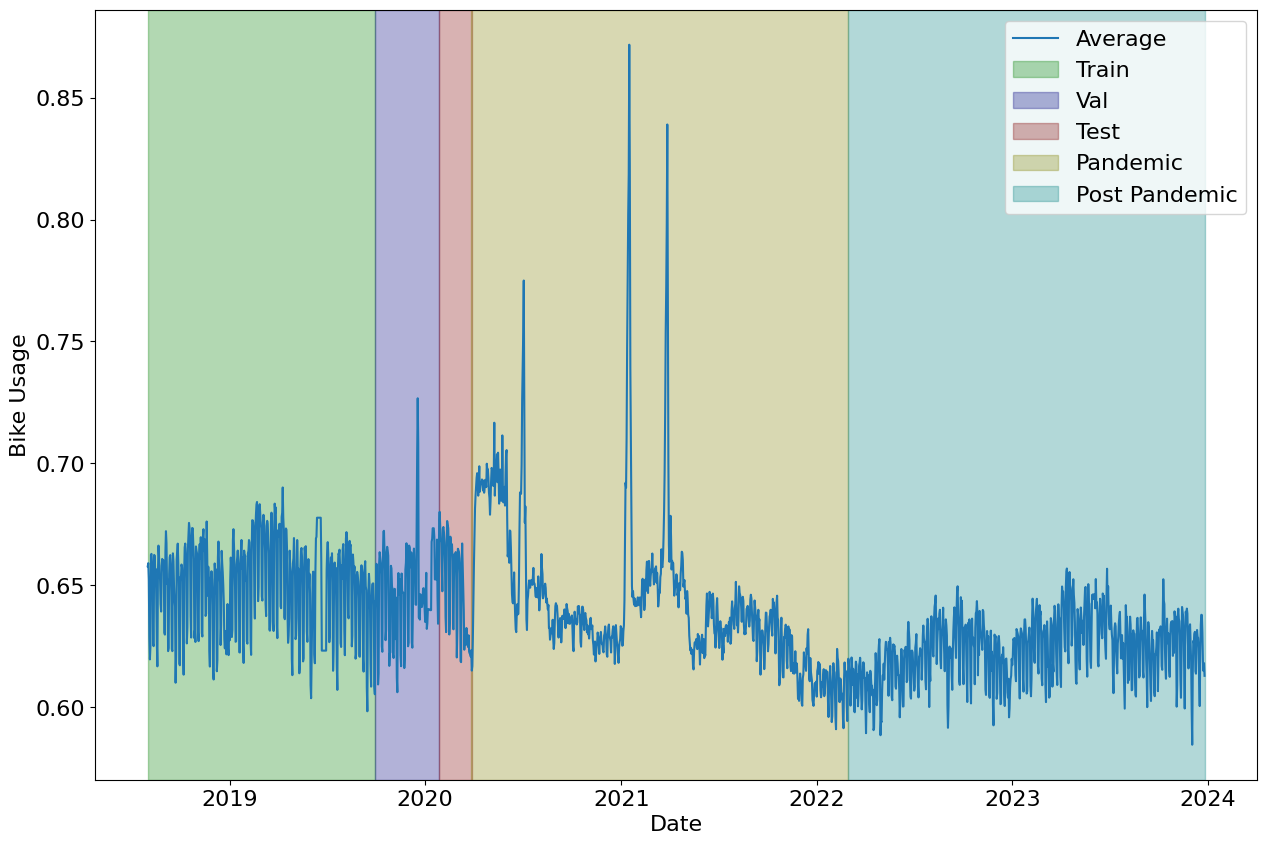

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ax.plot(data.resample("D")["BIKE USAGE"].mean(), label="Average")
#ax.plot(data.loc[data["ADDRESS"] == "Pearse Street"].resample("D")["BIKE USAGE"].mean(), label="Pearse Street", color=(0.5, 0.5, 0.0))

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd), ("2020-03-27", "2022-02-28"), ("2022-02-28", postPandemic.tail(1)["TIME"].iloc[0])]
labels = ["Train", "Val", "Test", "Pandemic", "Post Pandemic"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3), (0.5, 0.5, 0.0, 0.3), (0.0, 0.5, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

#for i in range(len(evalIDs)):
#    preds = prePandemic.loc[prePandemic["STATION ID"] == evalIDs[i]][range[0]:range[1]].resample("H").mean()
#    ax.plot(preds, color=(random.random(), random.random(), random.random(), 0.3), label=evalNames[i])

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

## Visualising last two weeks of validation data

Text(0, 0.5, 'Bike Usage')

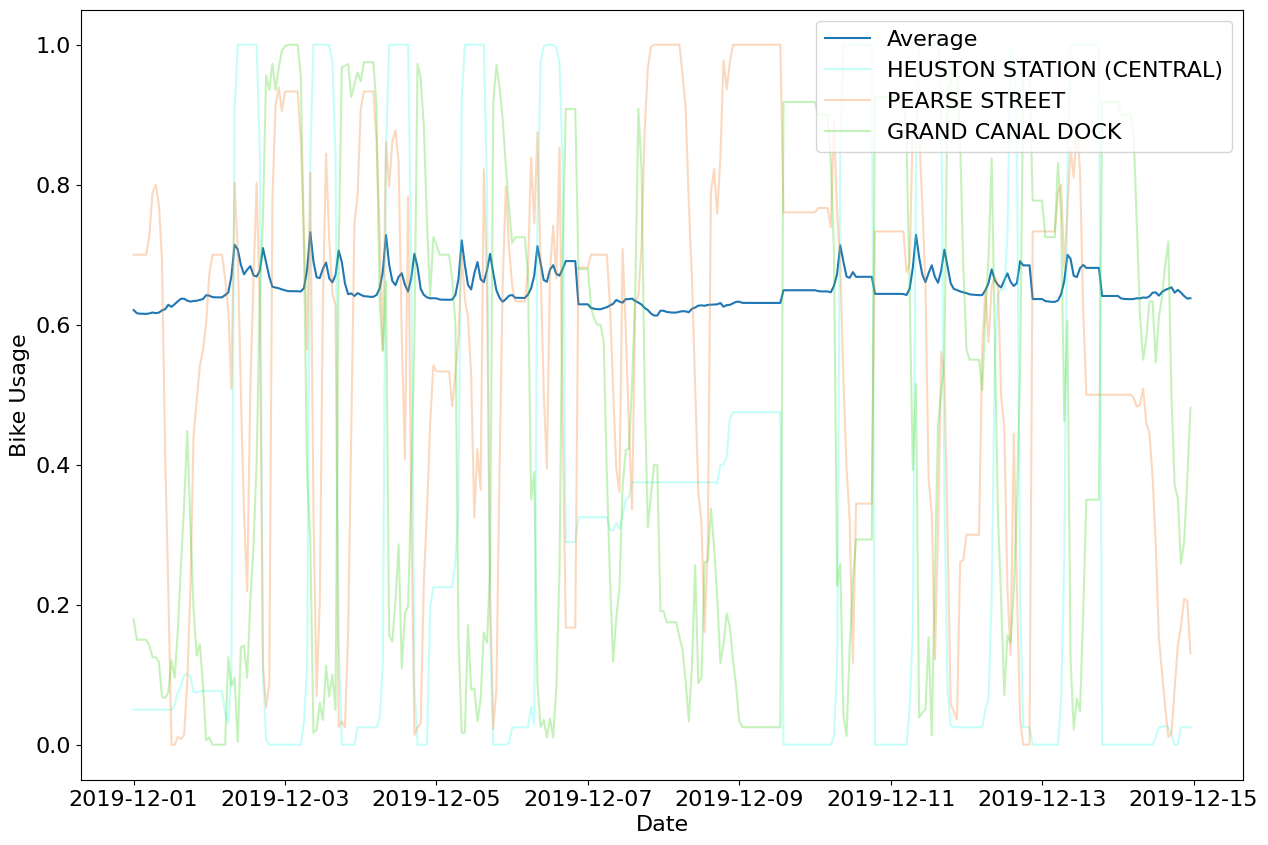

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

range = ("2019-12-01", "2019-12-14")

ax.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean(), label="Average")

i = 0
for id in evalIDs[:3]:
    stationData = prePandemic.loc[prePandemic["STATION ID"] == evalIDs[i]][range[0]:range[1]].resample("H")["BIKE USAGE"].mean()
    ax.plot(stationData, color=(random.random(), random.random(), random.random(), 0.3), label=evalStations[i])
    i += 1

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

## Baseline

In [53]:
from sklearn.metrics import mean_absolute_error

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [75]:
class AveragePredictor:
    keyset_to_average = {}
    overall_average = 0.0
    
    def __init__(self, keyFeatures=["STATION ID", "DAY OF WEEK", "HOUR OF DAY"]):
        self.keyFeatures = keyFeatures

    def train(self, dataframe):
        averages = dataframe.groupby(self.keyFeatures)["BIKE USAGE"].mean()
        for key in averages.keys():
            if len(key) != 3:
                print("WRONG "+len(key))
            self.keyset_to_average[key] = averages[key]
        overall_average = dataframe["BIKE USAGE"].mean()

    def predict(self, dataframe):
        def lookup(key):
            key = tuple(key)
            if key in self.keyset_to_average:
                return self.keyset_to_average[key]
            else:
                return self.overall_average
        return dataframe[self.keyFeatures].apply(lookup, axis=1, raw=True)

    def evaluate(self, dataframe, metric):
        y_true = dataframe["BIKE USAGE"]
        y_pred = self.predict(dataframe)
        
        return metric(y_true, y_pred)

In [76]:
baseline = AveragePredictor()

In [77]:
baseline.train(train)

In [57]:
baseline.evaluate(train, mean_absolute_error)

0.15547245690183545

In [58]:
baseline.evaluate(val, mean_absolute_error)

0.19332209888658403

In [79]:
prePandemicPreds = baseline.predict(prePandemic)

Text(0, 0.5, 'Bike Usage')

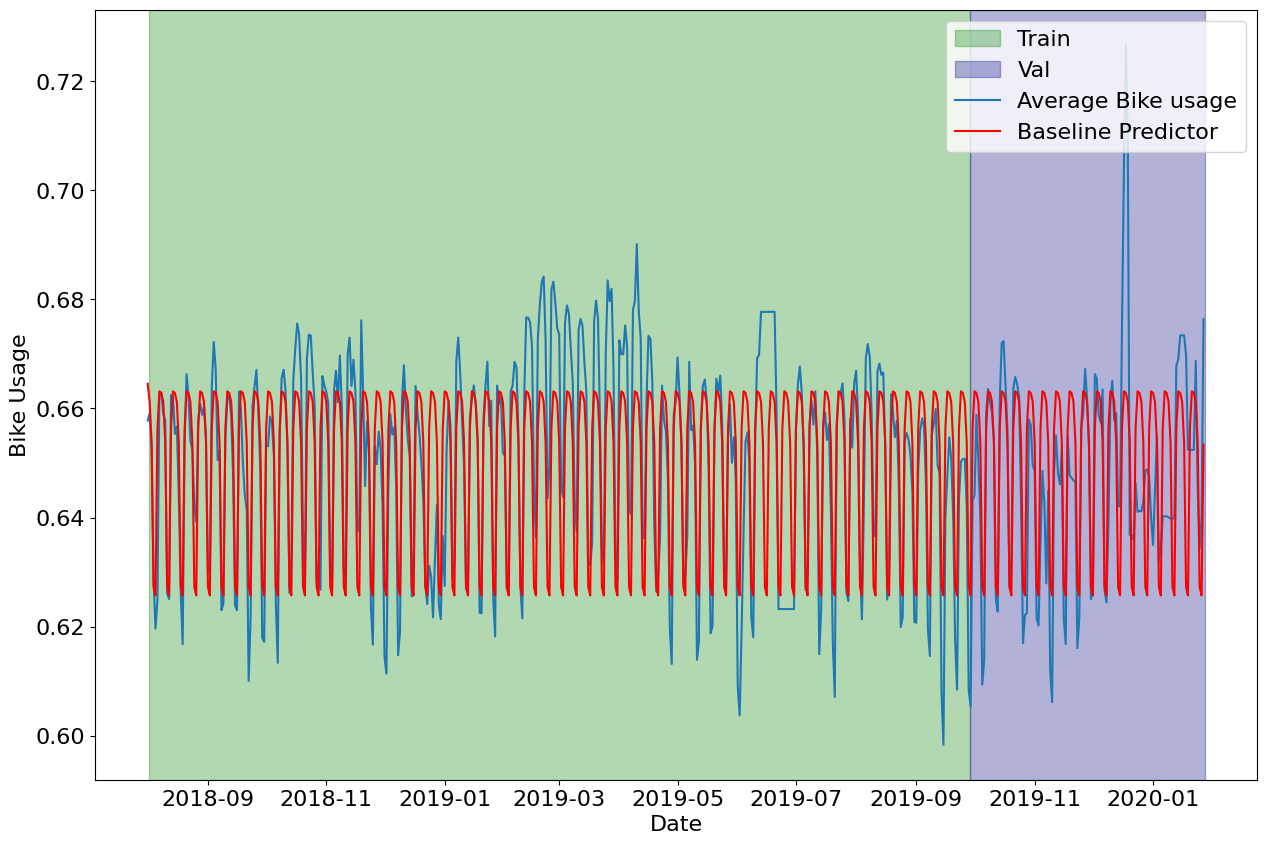

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart)]
labels = ["Train", "Val"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic[:testStart].resample("D")["BIKE USAGE"].mean(), label="Average Bike usage")
ax.plot(prePandemicPreds[:testStart].resample("D").mean(), label="Baseline Predictor", color=(1, 0.0, 0.0))

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

Text(0, 0.5, 'Bike Usage')

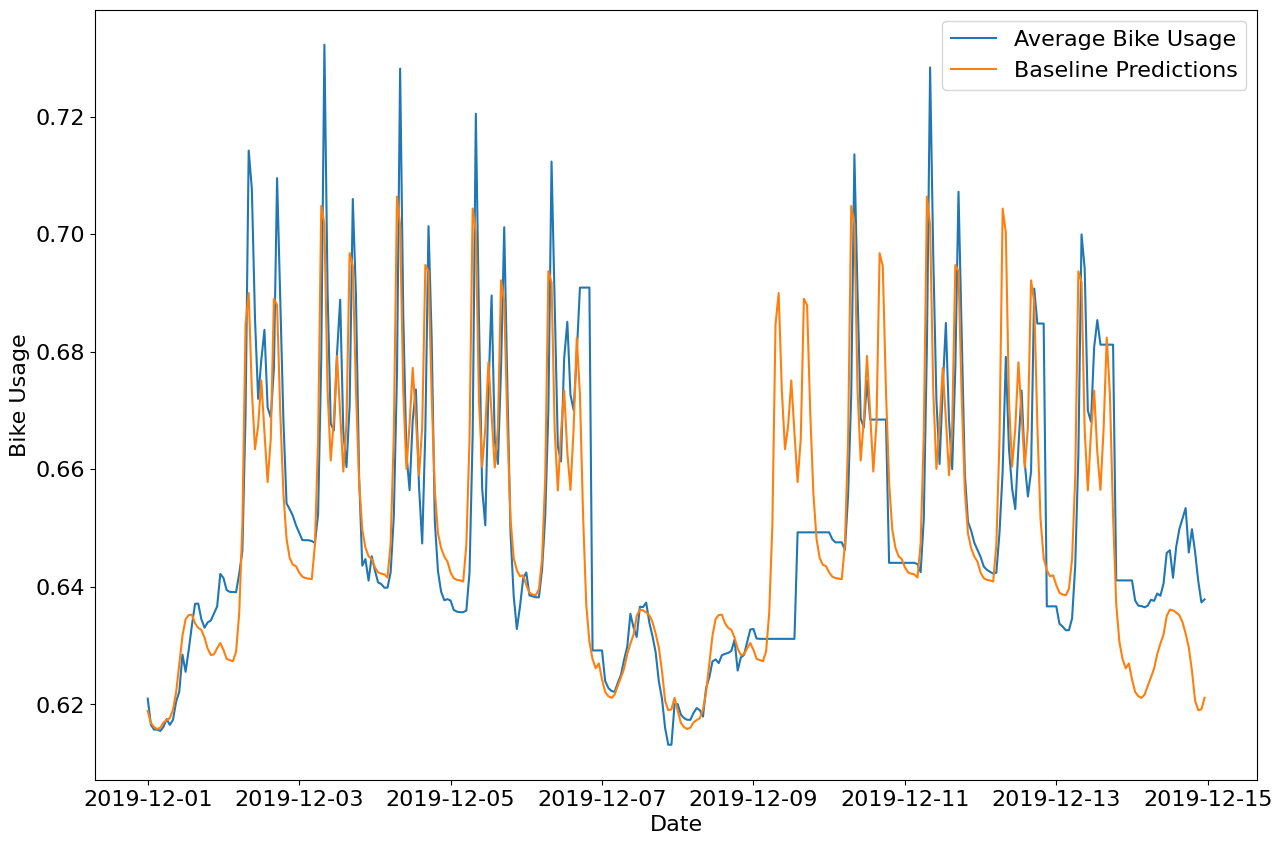

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

range = ("2019-12-01", "2019-12-14")

ax.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean(), label="Average Bike Usage")
ax.plot(prePandemicPreds[range[0]:range[1]].resample("H").mean(), label="Baseline Predictions")

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

## Visualising only pre-pandemic data

In [ ]:
i = 0
for id in evalIDs[:3]:
    color = (random.random(), random.random(), random.random(), 0.3)
    stationData = prePandemic.loc[prePandemic["STATION ID"] == evalIDs[i]][range[0]:range[1]].resample("H")["BIKE USAGE"].mean()
    ax.plot(stationData, color=color, label=evalStations[i])

    stationPredictions = prePandemicPreds.loc[prePandemic["STATION ID"] == evalIDs[i]][range[0]:range[1]].resample("H").mean()
    ax.plot(stationPredictions, color=color, label=evalStations[i])
    i += 1

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic.resample("D")["BIKE USAGE"].mean())

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

for id in random.sample(list(prePandemic["STATION ID"].unique()), 5):
    data = prePandemic.loc[prePandemic["STATION ID"] == id][:testStart].resample("D")["BIKE USAGE"].mean()
    ax.plot(data, color=(random.random(), random.random(), random.random(), 0.3))

ax.plot(prePandemic.loc[prePandemic["STATION ID"] == 4].resample("D")["BIKE USAGE"].mean())

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-10-01", "2019-10-08")

ax.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean(), label="Ground Truth")
i = 0
for id in evalIDs[:3]:
    preds = prePandemicPreds.loc[prePandemic["STATION ID"] == evalIDs[i]][range[0]:range[1]].resample("H").mean()
    ax.plot(preds, color=(random.random(), random.random(), random.random(), 0.3), label=evalStations[i])
    i += 1

In [ ]:
baselineNoStation = AveragePredictor(keyFeatures=["DAY OF WEEK", "HOUR OF DAY"])
baselineNoStation.train(train)

In [ ]:
prePandemicPreds = baseline.predict(prePandemic)

In [ ]:
ppns = baselineNoStation.predict(prePandemic)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart)]
labels = ["Train", "Val"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic[:testStart].resample("D")["BIKE USAGE"].mean(), label="Ground Truth")
ax.plot(prePandemicPreds[:testStart].resample("D").mean(), label="Predictions", color=(1, 0.0, 0.0))

In [ ]:
plt.plot(prePandemic[range[0]:range[1]]["BIKE USAGE"].count())

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-11-17", "2019-12-01")

#groundTruth = prePandemic.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H")["BIKE USAGE"].mean()
#preds = prePandemicPreds.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H").mean()

groundTruth = prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean()

preds = prePandemicPreds[range[0]:range[1]].resample("H").mean()
ax.plot(preds, label="Predictions for all", color=(1.0, 0.0, 0.0))

ax.plot(groundTruth, label="Ground Truth")
for id in random.sample(list(prePandemic["STATION ID"].unique()), 5):
    preds = prePandemicPreds.loc[prePandemic["STATION ID"] == id][range[0]:range[1]].resample("H").mean()
    ax.plot(preds, color=(random.random(), random.random(), random.random(), 0.3))